In [1]:
import os
os.chdir(os.pardir)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import vapor
from vapor.models import Cambium

2020-12-03 21:29:35,581 [MainThread  ] [INFO ]  Starting log for vapor...


In [2]:

dfs = []

# --- Define Optimization Variables ---
aggregate_region = 'pca'
opt_vars = ['project_return_aftertax_npv']#['marginal_cost_mwh']
scenarios = ['StdScen20_HighRECost', 'StdScen20_LowRECost', 'StdScen20_MidCase']
techs = ['pv', 'wind']
batt_sizes = [0., 25., 100.]
batt_durations = [4.]

for opt_var in opt_vars:
    for scenario in scenarios:
        for tech in techs:
            for batt_size in batt_sizes:
                for batt_duration in batt_durations:
                    file = f"{aggregate_region}_best_{tech}_{scenario}_{opt_var}_batt_{batt_size}_{batt_duration}.pkl"
                    fp = os.path.join('results',file)
                    dfs.append(pd.read_pickle(fp))


results = pd.concat(dfs, axis='rows')
results.reset_index(drop=True, inplace=True)

# --- Map on States ---
hierarchy = pd.read_csv(os.path.join('data','geography','region_hierarchy.csv'))
hierarchy.rename({'pca':'region'}, axis='columns', inplace=True)
df = results.merge(hierarchy[['region','state']], on='region', how='left')
                        
# --- Sort Systems to Keep best by State ---
df.sort_values(opt_vars[0], inplace=True)
df.drop_duplicates(['scenario','state','tech','batt_size'], inplace=True) #keep best performing system by region/scenario

# --- Clean up ---
df['lifetime_cambium_co2_rate_avg_mwh'] = df['lifetime_cambium_co2_rate_avg'] / df['lifetime_output_mwh']
df['lifetime_cambium_co2_rate_avg_mw'] = df['lifetime_cambium_co2_rate_avg'] / df['system_capacity']
df['lifetime_cambium_grid_value'] = df['lifetime_cambium_grid_value'] / df['system_capacity']

df.head()

,adjusted_installed_cost,analysis_period_irr,cash_for_debt_service,cbi_fedtax_total,cbi_statax_total,cbi_total,cbi_total_fed,cbi_total_oth,cbi_total_sta,cbi_total_uti,cf_length,cost_debt_upfront,cost_financing,cost_installed,cost_installedperwatt,cost_prefinancing,debt_fraction,depr_alloc_custom,depr_alloc_macrs_15,depr_alloc_macrs_5,depr_alloc_none,depr_alloc_none_percent,depr_alloc_sl_15,depr_alloc_sl_20,depr_alloc_sl_39,depr_alloc_sl_5,depr_alloc_total,depr_fedbas_after_itc_custom,depr_fedbas_after_itc_macrs_15,depr_fedbas_after_itc_macrs_5,depr_fedbas_after_itc_sl_15,depr_fedbas_after_itc_sl_20,depr_fedbas_after_itc_sl_39,depr_fedbas_after_itc_sl_5,depr_fedbas_after_itc_total,depr_fedbas_cbi_reduc_custom,depr_fedbas_cbi_reduc_macrs_15,depr_fedbas_cbi_reduc_macrs_5,depr_fedbas_cbi_reduc_sl_15,depr_fedbas_cbi_reduc_sl_20,depr_fedbas_cbi_reduc_sl_39,depr_fedbas_cbi_reduc_sl_5,depr_fedbas_cbi_reduc_total,depr_fedbas_custom,depr_fedbas_first_year_bonus_custom,depr_fedbas_first_year_bonus_macrs_15,depr_fedbas_first_year_bonus_macrs_5,depr_fedbas_first_year_bonus_sl_15,depr_fedbas_first_year_bonus_sl_20,depr_fedbas_first_year_bonus_sl_39,depr_fedbas_first_year_bonus_sl_5,depr_fedbas_first_year_bonus_total,depr_fedbas_fixed_amount_custom,depr_fedbas_fixed_amount_macrs_15,depr_fedbas_fixed_amount_macrs_5,depr_fedbas_fixed_amount_sl_15,depr_fedbas_fixed_amount_sl_20,depr_fedbas_fixed_amount_sl_39,depr_fedbas_fixed_amount_sl_5,depr_fedbas_fixed_amount_total,depr_fedbas_ibi_reduc_custom,depr_fedbas_ibi_reduc_macrs_15,depr_fedbas_ibi_reduc_macrs_5,depr_fedbas_ibi_reduc_sl_15,depr_fedbas_ibi_reduc_sl_20,depr_fedbas_ibi_reduc_sl_39,depr_fedbas_ibi_reduc_sl_5,depr_fedbas_ibi_reduc_total,depr_fedbas_itc_fed_reduction_custom,depr_fedbas_itc_fed_reduction_macrs_15,depr_fedbas_itc_fed_reduction_macrs_5,depr_fedbas_itc_fed_reduction_sl_15,depr_fedbas_itc_fed_reduction_sl_20,depr_fedbas_itc_fed_reduction_sl_39,depr_fedbas_itc_fed_reduction_sl_5,depr_fedbas_itc_fed_reduction_total,depr_fedbas_itc_sta_reduction_custom,depr_fedbas_itc_sta_reduction_macrs_15,depr_fedbas_itc_sta_reduction_macrs_5,depr_fedbas_itc_sta_reduction_sl_15,depr_fedbas_itc_sta_reduction_sl_20,depr_fedbas_itc_sta_reduction_sl_39,depr_fedbas_itc_sta_reduction_sl_5,depr_fedbas_itc_sta_reduction_total,depr_fedbas_macrs_15,depr_fedbas_macrs_5,depr_fedbas_percent_amount_custom,depr_fedbas_percent_amount_macrs_15,depr_fedbas_percent_amount_macrs_5,depr_fedbas_percent_amount_sl_15,depr_fedbas_percent_amount_sl_20,depr_fedbas_percent_amount_sl_39,depr_fedbas_percent_amount_sl_5,depr_fedbas_percent_amount_total,depr_fedbas_percent_custom,depr_fedbas_percent_macrs_15,depr_fedbas_percent_macrs_5,depr_fedbas_percent_qual_custom,depr_fedbas_percent_qual_macrs_15,depr_fedbas_percent_qual_macrs_5,depr_fedbas_percent_qual_sl_15,depr_fedbas_percent_qual_sl_20,depr_fedbas_percent_qual_sl_39,depr_fedbas_percent_qual_sl_5,depr_fedbas_percent_qual_total,depr_fedbas_percent_sl_15,depr_fedbas_percent_sl_20,depr_fedbas_percent_sl_39,depr_fedbas_percent_sl_5,depr_fedbas_percent_total,depr_fedbas_prior_itc_custom,depr_fedbas_prior_itc_macrs_15,depr_fedbas_prior_itc_macrs_5,depr_fedbas_prior_itc_sl_15,depr_fedbas_prior_itc_sl_20,depr_fedbas_prior_itc_sl_39,depr_fedbas_prior_itc_sl_5,depr_fedbas_prior_itc_total,depr_fedbas_sl_15,depr_fedbas_sl_20,depr_fedbas_sl_39,depr_fedbas_sl_5,depr_fedbas_total,depr_stabas_after_itc_custom,depr_stabas_after_itc_macrs_15,depr_stabas_after_itc_macrs_5,depr_stabas_after_itc_sl_15,depr_stabas_after_itc_sl_20,depr_stabas_after_itc_sl_39,depr_stabas_after_itc_sl_5,depr_stabas_after_itc_total,depr_stabas_cbi_reduc_custom,depr_stabas_cbi_reduc_macrs_15,depr_stabas_cbi_reduc_macrs_5,depr_stabas_cbi_reduc_sl_15,depr_stabas_cbi_reduc_sl_20,depr_stabas_cbi_reduc_sl_39,depr_stabas_cbi_reduc_sl_5,depr_stabas_cbi_reduc_total,depr_stabas_custom,depr_stabas_first_year_bonus_custom,depr_stabas_first_year_bonus_macrs_15,depr_stabas_first_year_bonus_macrs_5,depr_stabas_first_year_bonus

(0.0, 1000.0)

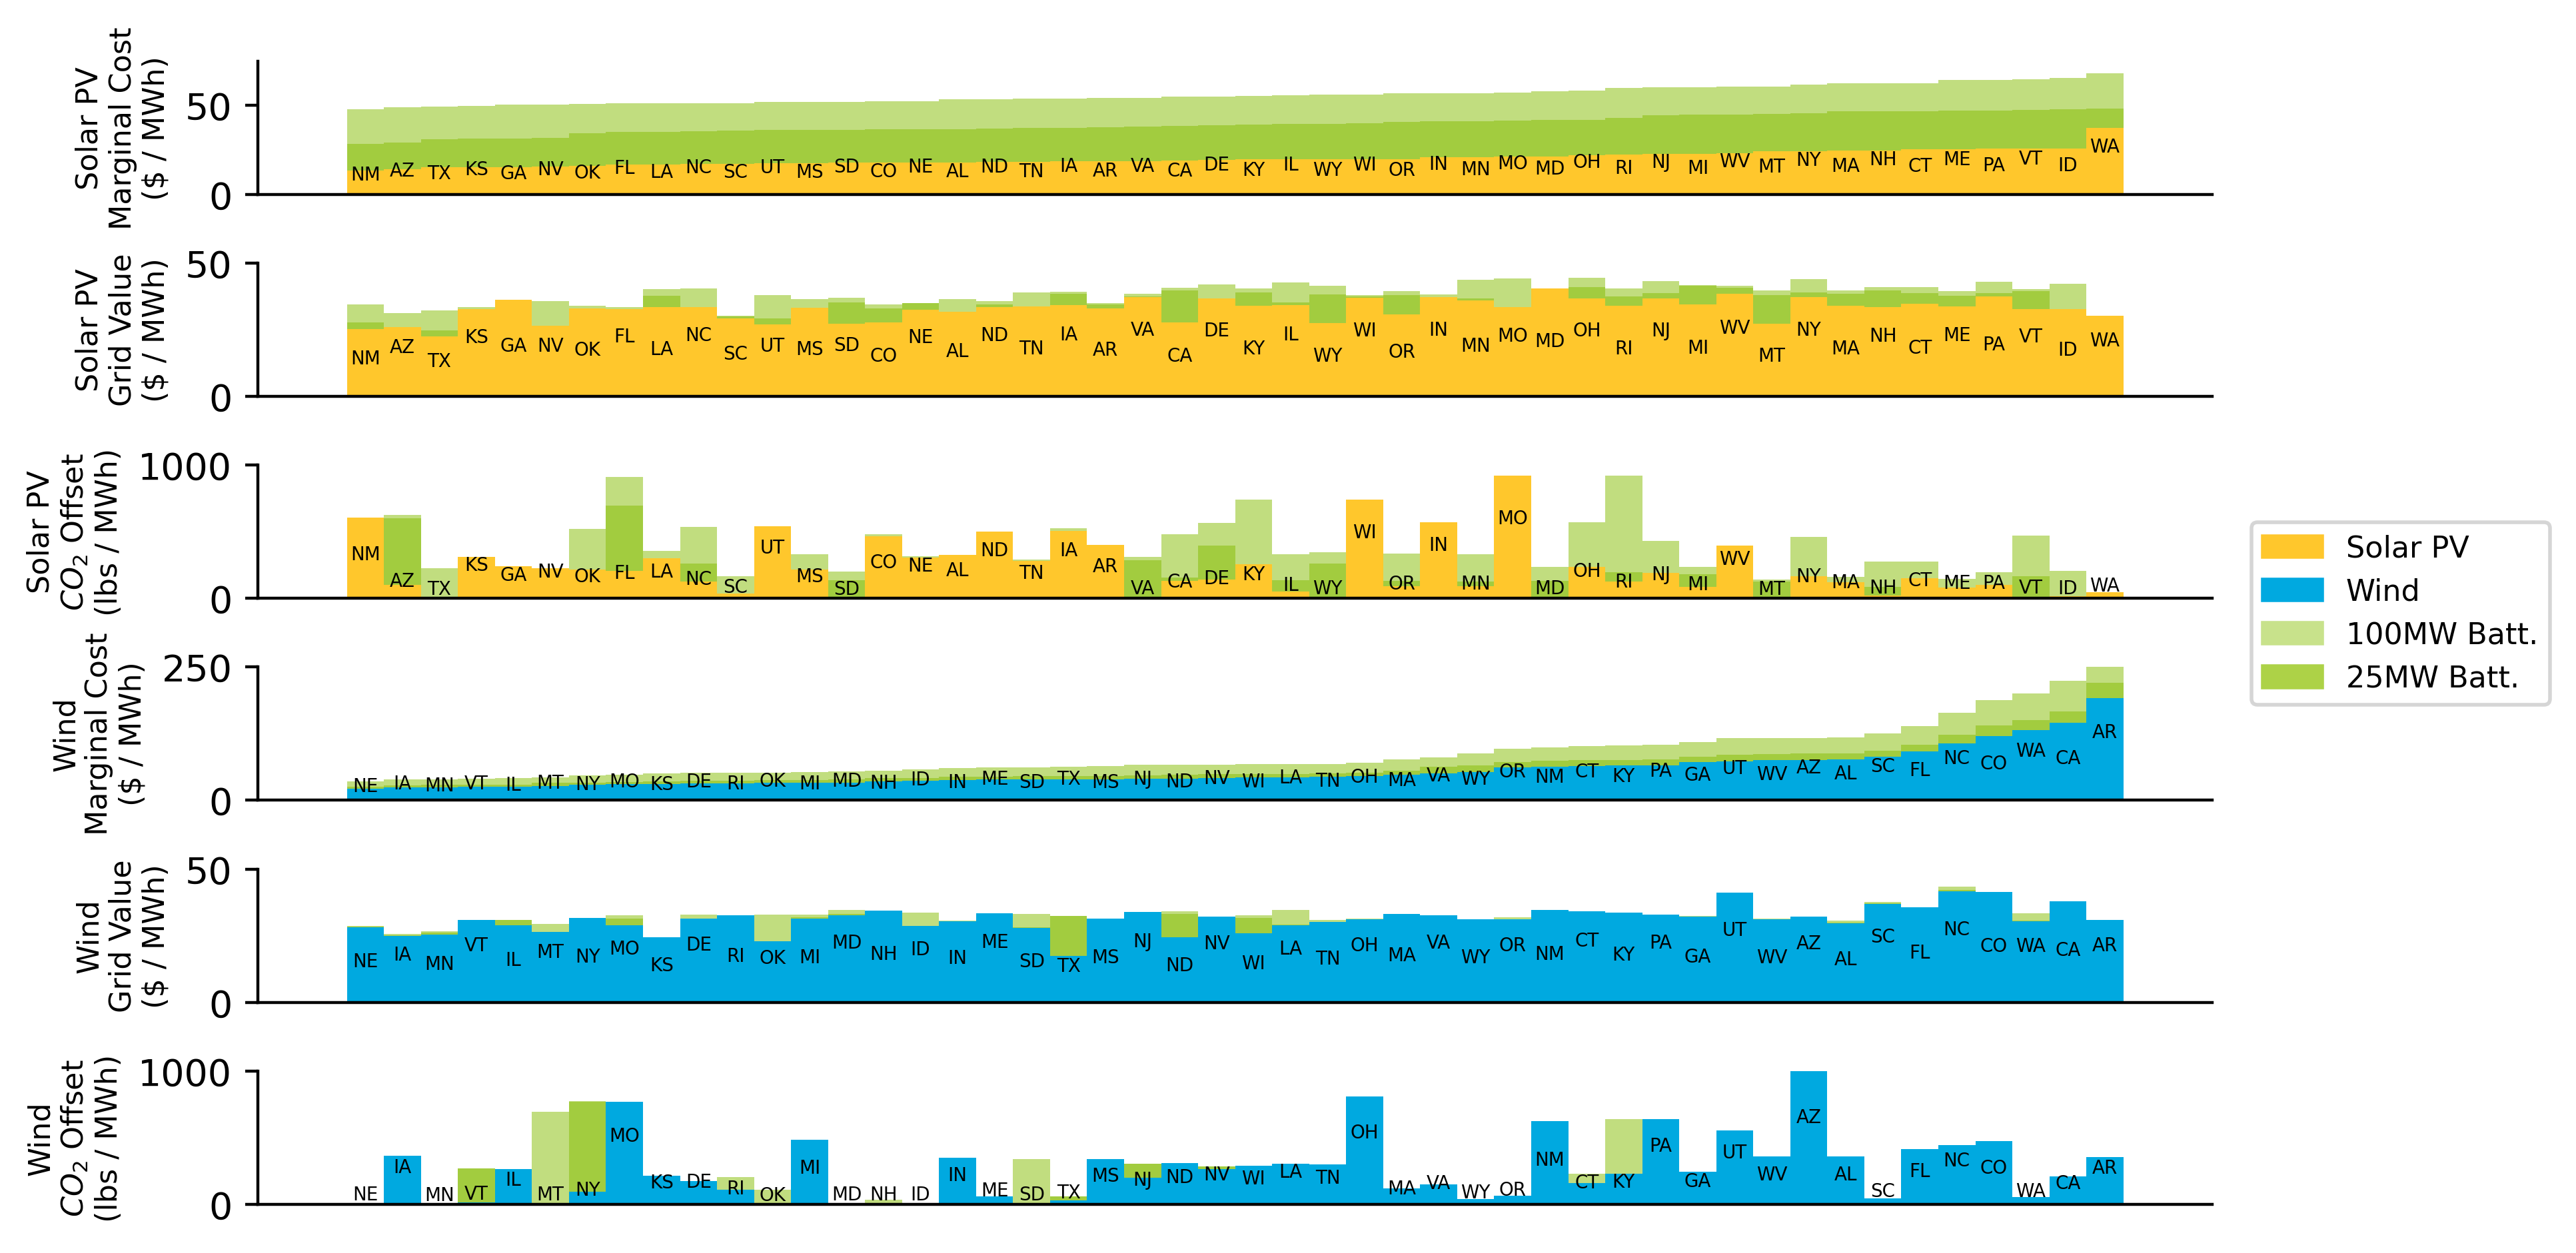

In [12]:

plot_df = df.copy()
opt_var = opt_vars[0]
plot_vars = ['marginal_cost_mwh','grid_value_per_mwh','lifetime_cambium_co2_rate_avg_mwh']
sort_var = plot_vars[0]
ascending=True
batt_sizes=[25,100]

label_dict = {
    'marginal_cost_mwh':'Marginal Cost\n($ / MWh)',
    'grid_value_per_mwh':'Grid Value\n($ / MWh)',
    'lifetime_cambium_grid_value_mw':'Grid Value\n($ / MW)',
    'lifetime_cambium_co2_rate_avg_mw':'$CO_2$ Offset\n(lbs / MW)',
    'lifetime_cambium_co2_rate_avg_mwh':'$CO_2$ Offset\n(lbs / MWh)'
}

tech_label_dict = {'pv':'Solar PV', 'wind':'Wind', 'batt25':'25MW Batt.', 'batt100':'100MW Batt.'}

nrel_color_dict = [
                '#0077C8', #darkblue
                '#00A9E0', #lightblue
                '#658D1B', #darkgreen
                '#84BD00', #lightgreen
                '#FFC72C', #yellow
                '#DE7C00', #orange
                '#5B6770', #darkgray
                '#C1C6C8' #lightgray
                ]

tech_dict = {'pv':nrel_color_dict[4],
            'wind':nrel_color_dict[1],
            'batt100':'#c8e28b',
            'batt25':'#add247'}


fig, axs = plt.subplots(nrows=len(plot_vars)*2, figsize=(8.5, 5), dpi=400, sharex=True)

axs_count = 0
for tech in ['pv','wind']:
    for plot_var in plot_vars:
        
        # --- subset scenario ---
        no_batt = plot_df.loc[(plot_df['scenario'] == scenario) & (plot_df['batt_size'] == 0) & (plot_df['tech'] == tech)]

        # --- drop duplicate techs for same state ---
        no_batt.sort_values(opt_var, ascending=ascending, inplace=True)
        no_batt.drop_duplicates(subset=['state', 'scenario'], inplace=True, keep='first')
        no_batt.sort_values(sort_var, ascending=ascending, inplace=True)

        # --- mock up widths and bar positions and color ---
        width = [i for i in no_batt['system_capacity']]

        relative_positions = []
        relative_position = 0
        previous_width = 0
        for w in width:
            relative_position = float(relative_position + (previous_width/2) + (w/2))
            previous_width = w
            relative_positions.append(relative_position)

        colors = no_batt['tech'].map(tech_dict)

        axs[axs_count].bar(relative_positions, no_batt[plot_var],
                    width=width, linewidth=0.0,
                    color=colors)

        # --- mock up label positions ---
        odd = -1
        for i, l in enumerate(no_batt['state']):
            x = relative_positions[i]
            y_max = list(no_batt[plot_var])[i]
            y =  y_max / 2 + (odd * y_max * 0.075)
            axs[axs_count].annotate(l, xy=(x,y), ha='center',va='bottom',
                                    fontsize=5)
            odd *= -1

        # --- plot battery bars ---
        if batt_sizes != None:
            for batt_size in batt_sizes:
                batt = plot_df.loc[(plot_df['scenario'] == scenario) & (plot_df['batt_size'] == batt_size) & (plot_df['tech'] == tech)]
                batt.sort_values(opt_var, ascending=ascending, inplace=True)
                batt.drop_duplicates(subset=['state', 'scenario'], inplace=True, keep='first')
                batt.sort_values(sort_var, ascending=ascending, inplace=True)

                axs[axs_count].bar(relative_positions, batt[plot_var],
                        width=width, linewidth=0.0, alpha=0.5,
                        color=nrel_color_dict[3], zorder=0)

        # --- clean up ---
#         plt.title(f'{scen_label_dict[scenario]}', fontsize=10)
        plt.subplots_adjust(hspace=0.5)
        axs[axs_count].set_ylabel(f"{tech_label_dict[tech]}\n{label_dict[plot_var]}", fontsize=8)
        plt.xlabel('')#Cumulative RE Capacity')
        # plt.ylim(-5, 70)
        axs_count += 1
        
        
plt.tight_layout()
custom_patches = [mpatches.Patch(color=v, label=tech_label_dict[k]) for k,v in tech_dict.items()]
axs[2].legend(handles=custom_patches, bbox_to_anchor=(1.02, 0.57), loc=2, borderaxespad=0., fontsize=8)

sns.despine(fig)

axs[5].set_xticks([], [])

axs[0].set_ylim(0,75)
axs[1].set_ylim(0,50)
axs[2].set_ylim(0,1000)
axs[3].set_ylim(0,250)
axs[4].set_ylim(0,50)
axs[5].set_ylim(0,1000)
    

1) optimize for net present value rather than Marginal Cost per MWh - battery didn't increase the total MWh of the system while the numerator increased, leading to consistently higher costs despite feasibly higher grid impacts
2) Don't report Marginal Cost MWh and instead focus on Grid Value, which can be equivocated as PPA price
3) Report both solar and wind as seperate supply curves, because the value per MWh will be skewed towards solar despite a likely smaller number of MWhs produced

In [4]:
grouped = results.groupby(['scenario','tech','batt_size'], as_index=False)\
                [['grid_value_per_mwh','lifetime_cambium_co2_rate_avg_mwh']].mean()
# grouped[['lifetime_cambium_co2_rate_avg','lifetime_cambium_grid_value']] /= 1e6

rename_dict = {'StdScen20_HighRECost':'High Cost', 'StdScen20_MidCase':'Mid Cost', 'StdScen20_LowRECost':'Low Cost'}
grouped['scenario'] = grouped['scenario'].map(rename_dict)
grouped['scenario'] = pd.Categorical(grouped['scenario'], categories=['Low Cost', 'Mid Cost', 'High Cost'], ordered=True)

tech_dict = {'pv':'PV', 'wind':'Wind'}
grouped['tech'] = grouped['tech'].map(tech_dict)

grouped.sort_values(['scenario','tech','batt_size'], inplace=True)
grouped.columns = ['Scenario','Tech','Batt Size (MW)', 'Grid Value ($ / MWh)', 'Avoided CO2 (lbs / MWh)']
grouped.to_csv(os.path.join('images','supply_curve_table.csv'))
grouped


,Scenario,Tech,Batt Size (MW),Grid Value ($ / MWh),Avoided CO2 (lbs / MWh)
6,Low Cost,PV,0.0,27.713968,220.156029
7,Low Cost,PV,25.0,30.816694,223.898782
8,Low Cost,PV,100.0,32.552124,230.782956
9,Low Cost,Wind,0.0,26.374207,212.699452
10,Low Cost,Wind,25.0,26.032054,210.374133
11,Low Cost,Wind,100.0,26.622324,209.487271
12,Mid Cost,PV,0.0,33.282984,268.129434
13,Mid Cost,PV,25.0,36.063996,271.425606
14,Mid Cost,PV,100.0,37.515179,276.450097
15,Mid Cost,Wind,0.0,30.543849,265.168604


In [5]:
set(pd.read_pickle('results/state_best_pv_StdScen19_High_RE_Cost_marginal_cost_mwh_batt_100.0_4.0.pkl'))

{'6par_Adj',
 '6par_Il',
 '6par_Io',
 '6par_Rs',
 '6par_Rsh',
 '6par_a',
 'ac_loss',
 'adjusted_installed_cost',
 'analysis_period_irr',
 'annual_ac_battery_loss_percent',
 'annual_ac_gross',
 'annual_ac_inv_clip_loss_percent',
 'annual_ac_inv_eff_loss_percent',
 'annual_ac_inv_pnt_loss_percent',
 'annual_ac_inv_pso_loss_percent',
 'annual_ac_inv_tdc_loss_percent',
 'annual_ac_lifetime_loss_percent',
 'annual_ac_loss_ond',
 'annual_ac_perf_adj_loss_percent',
 'annual_ac_wiring_loss',
 'annual_ac_wiring_loss_percent',
 'annual_dc_battery_loss_percent',
 'annual_dc_diodes_loss',
 'annual_dc_diodes_loss_percent',
 'annual_dc_gross',
 'annual_dc_invmppt_loss',
 'annual_dc_lifetime_loss_percent',
 'annual_dc_loss_ond',
 'annual_dc_mismatch_loss',
 'annual_dc_mismatch_loss_percent',
 'annual_dc_module_loss_percent',
 'annual_dc_mppt_clip_loss_percent',
 'annual_dc_nameplate_loss',
 'annual_dc_nameplate_loss_percent',
 'annual_dc_net',
 'annual_dc_nominal',
 'annual_dc_optimizer_loss',
 'annu

In [6]:
# spaghetti plot of existing 'lifetime_cambium_total_value' through 2050
# spaghetti plot of existing co2 through 2050 